In [22]:
import pickle
from collections import Counter
from pathlib import Path
from string import punctuation

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import spacy as spc
from hdbscan import HDBSCAN
from matplotlib.colors import LinearSegmentedColormap
from sklearn.cluster import SpectralClustering
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import spectral_embedding
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score, fowlkes_mallows_score, v_measure_score
from sklearn.metrics.pairwise import cosine_similarity
from umap import UMAP

nlp = spc.load("en_core_web_sm", disable=["ner"])

seed = 42
np.random.seed(seed)
random_state = np.random.RandomState(seed)

In [2]:
dataset = fetch_20newsgroups(subset="all", random_state=random_state, remove=("headers", "footers", "quoter"))
corpus = dataset.data
y = dataset.target
y_names = dataset.target_names
print(len(np.unique(y_names)))

20


In [3]:
path_to_preprocessed_corpus = "preprocessed_corpus.pkl"
if Path(path_to_preprocessed_corpus).is_file():
    with open(path_to_preprocessed_corpus, "rb") as f:
        preprocessed_corpus = pickle.load(f)
else:
    preprocessed_corpus = []
    for i, text in enumerate(corpus):
        doc = nlp(text.lower(), disable=["tagger", "parser"])
        text = " ".join([
            token.lemma_.strip(punctuation) for token in doc if not token.is_stop and not token.is_punct and
                                                                not token.like_email and not token.is_bracket and
                                                                not token.is_quote and not token.is_currency and 
                                                                not token.like_num and not token.is_space and
                                                                not token.like_url and token.lemma_ != "-PRON-"
        ])
        doc = nlp(text)
        preprocessed_corpus.append([
            token.lemma_.strip() for token in doc if not token.is_stop and not token.is_punct and
                                                     not token.like_email and not token.is_bracket and
                                                     not token.is_quote and not token.is_currency and 
                                                     not token.like_num and not token.is_space and
                                                     not token.like_url and token.lemma_.isalpha()
        ])
    with open(path_to_preprocessed_corpus, "wb") as f:
        pickle.dump(preprocessed_corpus, f)

In [99]:
vectorizer = TfidfVectorizer(preprocessor=lambda x: x, tokenizer=lambda x: x, min_df=2)
tfidf_doc_term_matrix = vectorizer.fit_transform(preprocessed_corpus)
print(tfidf_doc_term_matrix.shape)

# for feature in vectorizer.get_feature_names():
#     print(feature)

aa
aaa
aaaaa
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg
aaaggghhh
aaah
aah
aam
aamir
aammmaaaazzzzzziinnnnggggg
aanerud
aap
aaplay
aargh
aarhus
aaron
aaroundpluto
aarp
aas
aawin
ab
ababa
ababs
abad
abandon
abandonment
abate
abba
abberation
abbey
abbot
abbott
abbreviation
abc
abd
abdel
abdoman
abdomen
abdominal
abduct
abduction
abdul
abdullah
abe
abed
abel
aben
aberdeen
aberrant
aberration
abet
abetter
abhijit
abhin
abhor
abhorent
abhorrant
abhorrence
abhorrent
abide
abig
ability
abingdon
abiogenesis
abject
ablaze
able
ablution
ably
abner
abnormal
abnormality
abnormally
aboard
abolish
abolishment
abolition
abolitionist
abominable
abomination
aboriginal
abort
abortion
abortionist
abot
abott
abotu
abound
about
abraham
abrahamic
abram
abramowitz
abrams
abrasion
abrasive
abreast
abreviation
abridge
abridgement
abridgment
abroad
abrogate
abrogation
abrupt
abruptly
abscence
absence
absense
absent
absentee
absolut
absolute
absolutely
absolutism
absolutist
a

In [100]:
similarity_matrix = cosine_similarity(tfidf_doc_term_matrix)

In [135]:
embedding = spectral_embedding(similarity_matrix, n_components=40, drop_first=False, random_state=random_state)

# clusters = SpectralClustering(
#     n_clusters=20, affinity="precomputed", random_state=random_state, n_jobs=-1
# ).fit_predict(similarity_matrix)
# 
# counter = Counter(clusters)
# print(f"cluster sizes: {sorted(counter.items(), key=lambda x: x[1], reverse=True)}")

c:\users\thalvari\pycharmprojects\nlp20_project\venv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [137]:
print(embedding.shape)
df = pd.DataFrame(embedding)
first_ev = df[0].values.round(10)
counter = Counter(first_ev)
largest_cc_calue = counter.most_common(1)[0][0]
embedding_largest_cc_only = df[first_ev == largest_cc_calue].values
print(embedding_largest_cc_only.shape)

(18846, 40)
(18795, 40)


In [138]:
# df_tfidf = pd.DataFrame(tfidf_doc_term_matrix.toarray())
# print(df_tfidf.shape)
# tfidf_doc_term_matrix_2 = df_tfidf[first_ev == largest_cc_calue].values
# print(tfidf_doc_term_matrix_2.shape)
# similarity_matrix_2 = cosine_similarity(tfidf_doc_term_matrix_2)
# embedding_2 = spectral_embedding(similarity_matrix_2, n_components=20, drop_first=True, random_state=random_state)
# embedding_2 = UMAP(n_components=2, n_neighbors=30, min_dist=0.0, random_state=random_state).fit_transform(embedding_2)

In [139]:
embedding_2d = UMAP(
    n_components=2, n_neighbors=30, min_dist=0.0, random_state=random_state
).fit_transform(embedding_largest_cc_only)

c:\users\thalvari\pycharmprojects\nlp20_project\venv\lib\site-packages\numba\typed_passes.py:292: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "venv\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  warnings.warn(errors.NumbaPerformanceWarning(msg,


In [221]:
clusters = HDBSCAN(
    min_samples=1, min_cluster_size=250, core_dist_n_jobs=-1
).fit_predict(embedding_2d)
counter = Counter(clusters)
print(f"clusters: {np.amax(clusters) + 1}")
print(f"cluster sizes: {sorted(counter.items(), key=lambda x: x[1], reverse=True)}")
print(f"noise level: {np.round(counter[-1] / len(clusters), 3)}")

clusters: 24
cluster sizes: [(23, 2029), (-1, 1929), (0, 1793), (21, 1384), (20, 991), (3, 745), (2, 707), (19, 676), (18, 667), (10, 652), (4, 634), (7, 609), (12, 597), (6, 570), (11, 561), (8, 551), (15, 523), (22, 521), (1, 484), (14, 468), (17, 461), (13, 353), (9, 329), (5, 300), (16, 261)]
noise level: 0.103


In [222]:
y_df = pd.DataFrame(y)
y_df = y_df[first_ev == largest_cc_calue]
print(y_df.shape)

# data_df = pd.concat([pd.DataFrame(embedding_2d), y_df], axis=1)
# print(data_df)

(18795, 1)


In [223]:
palette = plt.cm.Set3.colors \
          + plt.cm.Set2.colors[5:7] \
          + plt.cm.tab10.colors[:-1] \
          + tuple(plt.cm.tab20c.colors[i] for i in [4]) \
          + tuple(plt.cm.tab20b.colors[i] for i in [0, 4, 8, 12, 16]) \
          + plt.cm.tab10.colors[-1:]
cmap = LinearSegmentedColormap.from_list("custom", palette, N=len(palette))

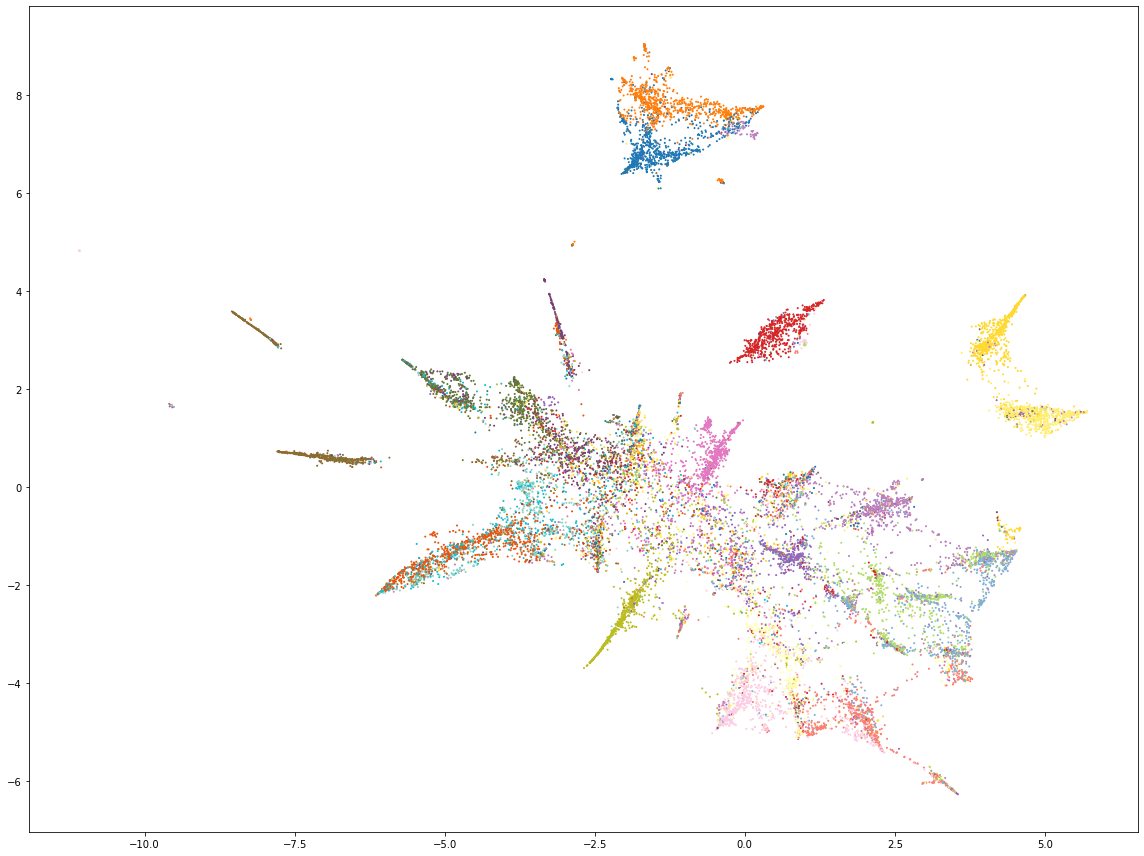

In [224]:
plt.figure(figsize=(16, 12))
# sns.scatterplot(x=0, y=1, hue="y", data=data_df, palette=sns.color_palette(palette, 20))
# plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=y_df.values, s=1, cmap="tab20")
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=y_df.values, s=1, cmap=cmap)
# plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=y, s=1, cmap="tab20")
plt.tight_layout()
plt.show()

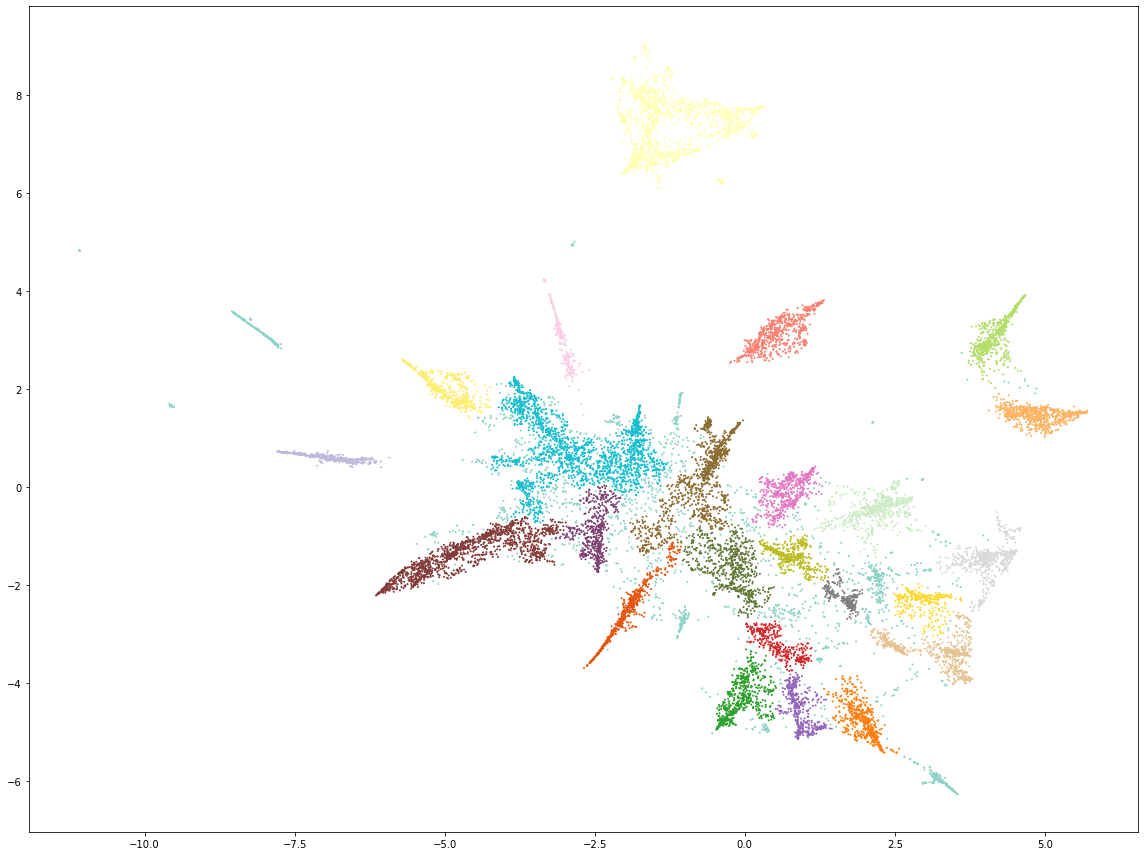

In [225]:
plt.figure(figsize=(16, 12))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=clusters, s=1, cmap=cmap)
plt.tight_layout()
plt.show()

In [226]:
print(f"AMI: {adjusted_mutual_info_score(y_df.values.flatten() , clusters)}")
print(f"ARI: {adjusted_rand_score(y_df.values.flatten() , clusters)}")
print(f"V-measure: {v_measure_score(y_df.values.flatten() , clusters)}")
print(f"Fowlkes-Mallows: {fowlkes_mallows_score(y_df.values.flatten() , clusters)}")

AMI: 0.45722108889281027
ARI: 0.2895548283487668
V-measure: 0.4594168905133495
Fowlkes-Mallows: 0.32799096972524894
